# Time-Resolved Photo-Luminescence del PbS 900

Questo fit non vuole proprio venire!

Devo leggere tre file. La funzione che se ne occupa in qp2_subroutines è scritta con wrangler.

In [ ]:
cartella = 'data/TRPL_PbS900/'
nome1 = 'PbS900_ex-nkt750_em-928e25_50ns_binw100ps_180s.csv'
nome2 = 'PbS900_ex-nkt750_em-928e25_50ns_binw100ps_1800s.csv'
nome3 = 'PbS900_ex-nkt750_em-930e25_1800s_highres.csv'

nomi = [nome1, nome2, nome3]

Capire cosa indicano tutti questi parametri nel nome del file!

## Importazioni

In [261]:
from qp2_subroutines import *
import os

In [262]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Servirà dopo per i colori nei grafici.

In [263]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

---

## Traslazione dei counts (rispetto a baseline)

In [ ]:
def trasla_counts_abs (y, r):
    # prendo l'indice del massimo sulle y
    i_max = np.argmax(y)
    # prendo la regione di tempo prima del picco
    regione = y[:i_max-1]
    # calcolo la media in questa regione
    media_regione = np.mean(regione)
    # e anche la dev st, che tolgo un pezzetto anche di quella 
    dev_regione = np.std(regione)
    
    # traslo
    y = y - media_regione - r*dev_regione
    
    y = np.where(y<0,0,y)
    
    return y

---

# Analisi

#### Cntenitore per i dati

In [265]:
PbS_trpl = []

#### Lettura dei file

In [266]:
for nome in nomi:
    # estraggo dati dai file e raccolgo
    nome = cartella + nome
    time, counts, curva1, curva2 = read_trpl_csv(nome) 
    PbS_trpl.append((time, counts, curva1, curva2))

---

In [267]:
params = [
    [0.25, 50000, 0.53, 10, 10, 0.2],
    [1, 7e04, 1, 3e04, 10, 0.2],
    [1, 7e04, 1, 3e04, 10, 0.2],
]

---

# PRIMA COLONNA

Alcuni accorgimenti:
- non normalizzare
- scala logaritmica asse y 
- fittare a partire dal punto appena dopo il massimo

#### Plotto la prima delle due colonne

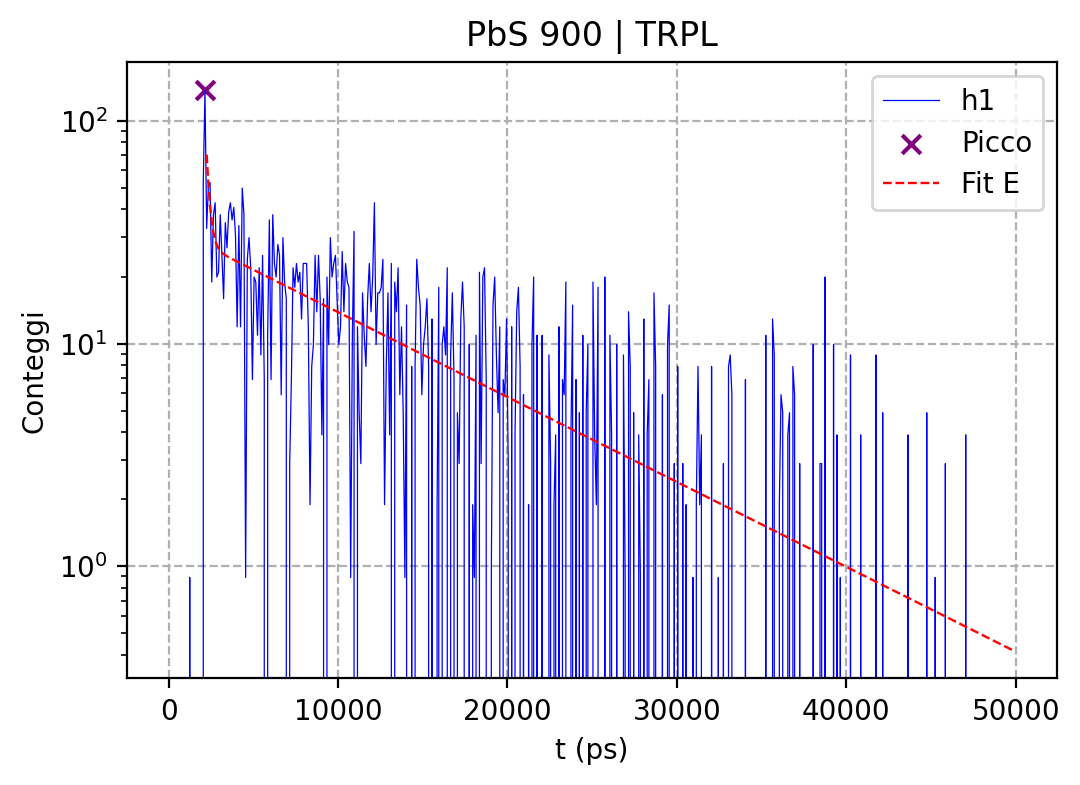

Fit 1^a colonna | -------------------
 - $a_1$ = 30.10113 ± 4101085.35744
 - $\tau_1$ = 11394.29 ± 1317.87
 - $a_2$ = 16080.70053 ± 133639324250.79951
 - $\tau_2$ = 186.80 ± 97.71
 - $\Delta_x$ = 1144.42 ± 1552398747.20
 - $\Delta_y$ = 0.00000 ± 0.65675
 - $\chi_2/ndf$ = 0.70


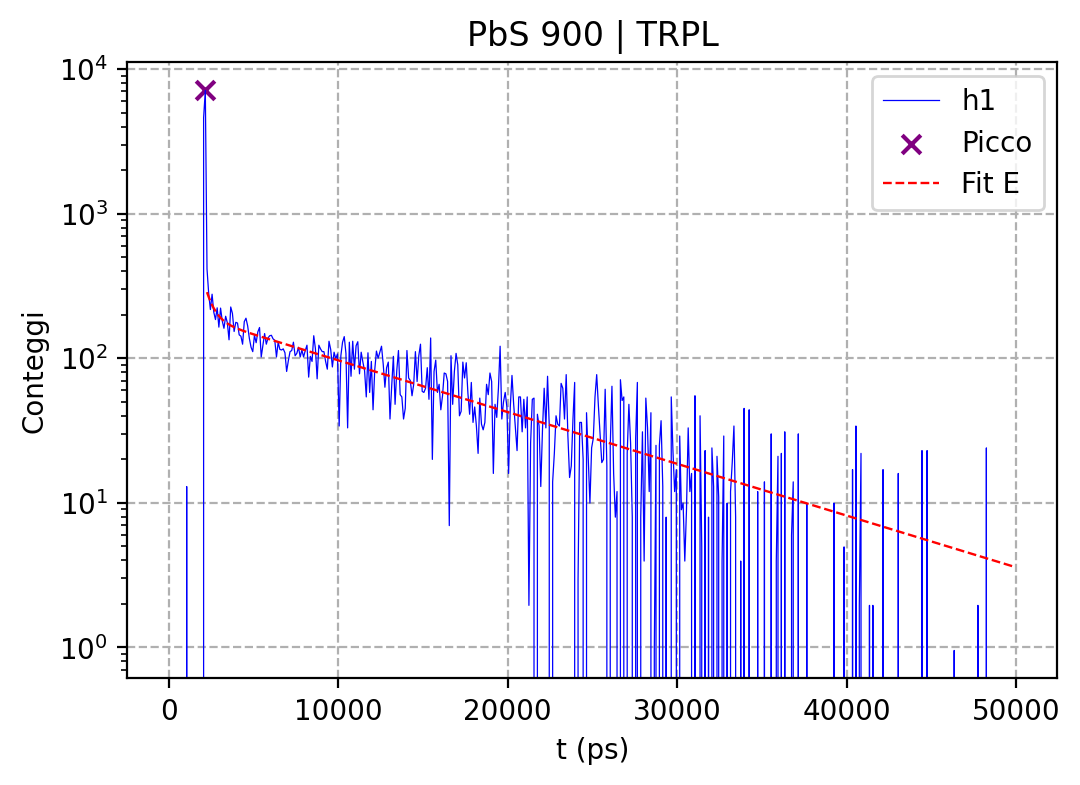

Fit 1^a colonna | -------------------
 - $a_1$ = 209.55068 ± 16320067.58338
 - $\tau_1$ = 12137.38 ± 743.55
 - $a_2$ = 3368.21699 ± 6725867537.77344
 - $\tau_2$ = 473.38 ± 174.20
 - $\Delta_x$ = 600.14 ± 945274078.76
 - $\Delta_y$ = 0.00000 ± 2.31446
 - $\chi_2/ndf$ = 0.86


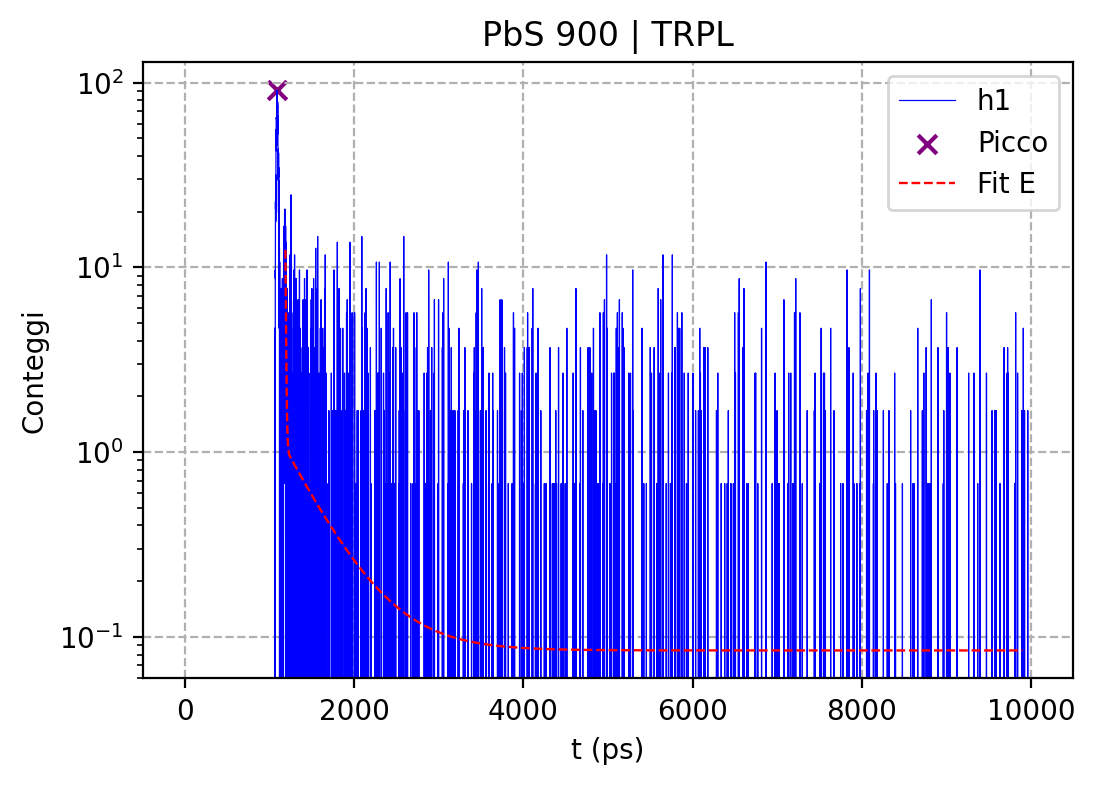

Fit 1^a colonna | -------------------
 - $a_1$ = 0.99288 ± 50894.90788
 - $\tau_1$ = 477.10 ± 65.10
 - $a_2$ = 138.15215 ± 528815267.89143
 - $\tau_2$ = 6.39 ± 0.73
 - $\Delta_x$ = 1168.54 ± 24456342.51
 - $\Delta_y$ = 0.08416 ± 0.01039
 - $\chi_2/ndf$ = 0.32


In [ ]:
for i, quadrupla in enumerate(PbS_trpl):
    time = np.array(quadrupla[0])
    curva1 = np.array(quadrupla[2])
    
    ## (NON) normalizzo i counts ##
    i_max1 = np.argmax(curva1)
    maximum1 = curva1[i_max1]
    # prima propago l'errore
    err_curva1 = np.sqrt(curva1) # / maximum1
    #curva1 = curva1 / maximum1
    
    curva1 = trasla_counts_abs(curva1, 2)


    # Plot
    plt.figure(figsize=(6,4), dpi=200)
    plt.plot(time, curva1, linestyle='-', color='b', linewidth=0.45, label='h1')#, zorder=1)
    
    ## FIT DOPPIO ESPONENZIALE ##
    
    t_sup = max(time)-100
    
    # per capire dove secondo lui c'è il massimo di curve1
    x_picco = time[i_max1] 
    y_picco = curva1[i_max1]
    plt.scatter(x_picco, y_picco, 
                color=col[3], marker='x',
                label='Picco', s=45)
    
    t_inf = x_picco + 100 # aggiungo 100 che è la larghezza dei bin nel primo e secondo file (nel terzo è 1ps)
        
    # isolo regione fit
    mask = (time > t_inf) & (time < t_sup)
    x_fit = time[mask]
    y_fit1 = curva1[mask]
    err_fit1 = err_curva1[mask]

    # parametri (a1, tau1, a2, tau2)
    par = [1, 1750, 1, 12]
    par.append(2000) # il delta_x
    par.append(0.2) # il delta_y
    # usando risultato terzo fit
    #par = [0.07565398747075835, 2265.6438665046385, 5250554992968956.0, 29.236927103129098, 0, 0.26338796610139725]
    
    #par = params[i]
    
    low = [0, 0, 0, 0]
    low.append(-np.inf) # inf delta_x
    low.append(0) # inf delta_y
    upp = [np.inf, np.inf, np.inf, np.inf]
    upp.append(5000) # sup delta_x
    upp.append(0.5) # sup delta_y
    
    popt1, pcov1 = curve_fit(doppio_esponenziale, x_fit, y_fit1, sigma=err_fit1, p0=par, bounds=(low,upp))
    
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(t_inf, t_sup, len(x_fit))
    y_plot1 = doppio_esponenziale(x_plot, *popt1)
    plt.plot(x_plot, y_plot1, linestyle='--', color=col[0], label=f"Fit E", linewidth=0.85)#, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'PbS 900 | TRPL')
    plt.xlabel("t (ps)")
    #plt.xscale('log')
    plt.ylabel("Conteggi")
    plt.yscale('log')
    #plt.ticklabel_format(axis='x',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    ## CHI QUADRO ##
    chi2, dof = chi2_doppio_esponenziale (x_fit, y_fit1, popt1, err_y=err_fit1)
    
    ## ERRORI SUL FIT ##
    perr1 = np.sqrt(np.diag(pcov1))
    
    ## PRINT RISULTATI ##
    print('Fit 1^a colonna | -------------------')
    print(r' - $a_1$ = {:.5f} ± {:.5f}'.format(popt1[0], perr1[0]))
    print(r' - $\tau_1$ = {:.2f} ± {:.2f}'.format(popt1[1], perr1[1]))
    print(r' - $a_2$ = {:.5f} ± {:.5f}'.format(popt1[2], perr1[2]))
    print(r' - $\tau_2$ = {:.2f} ± {:.2f}'.format(popt1[3], perr1[3]))
    print(r' - $\Delta_x$ = {:.2f} ± {:.2f}'.format(popt1[4], perr1[4]))
    print(r' - $\Delta_y$ = {:.5f} ± {:.5f}'.format(popt1[5], perr1[5]))
    print(r' - $\chi_2/ndf$ = {:.2f}'.format(chi2/dof))
    '''print('Fit 2 | ----------------')
    print(r' - $a_1$ =', popt2[0])
    print(r' - $\tau_1$ =', popt2[1])
    print(r' - $a_2$ =', popt2[2])
    print(r' - $\tau_2$ =', popt2[3])'''
    
    

## SUL TERZO GRAFICO 

CALCOLARE I CHI QUADRI PER VEDERE QUALE È MEGLIO

#### RISULTATO BUONO 1

Fit 1 | -------------------
 - $a_1$ = 0.07565352476154645
 - $\tau_1$ = 2265.643866504654
 - $a_2$ = 5250554992968956.0
 - $\tau_2$ = 29.23683535702479
 - $\Delta_x$ = 9.999991012913695e-11
 - $\Delta_y$ = 0.2633854930839045

#### RISULTATO BUONO 2

Fit 1 | -------------------
 - $a_1$ = 0.06908221116809946
 - $\tau_1$ = 1750.7174333561231
 - $a_2$ = 3670929251895398.5
 - $\tau_2$ = 12.936254532095045
 - $\Delta_x$ = 617.8616861955198
 - $\Delta_y$ = 0.2650814036983357

#### RISULTATO BUONO 3

Fit 1 | -------------------
 - $a_1$ = 0.05410562550690957
 - $\tau_1$ = 1751.4817702119788
 - $a_2$ = 16.090171372756533
 - $\tau_2$ = 12.935462870256577
 - $\Delta_x$ = 1045.5440471786833
 - $\Delta_y$ = 0.26507807462758254

---

# SECONDA COLONNA

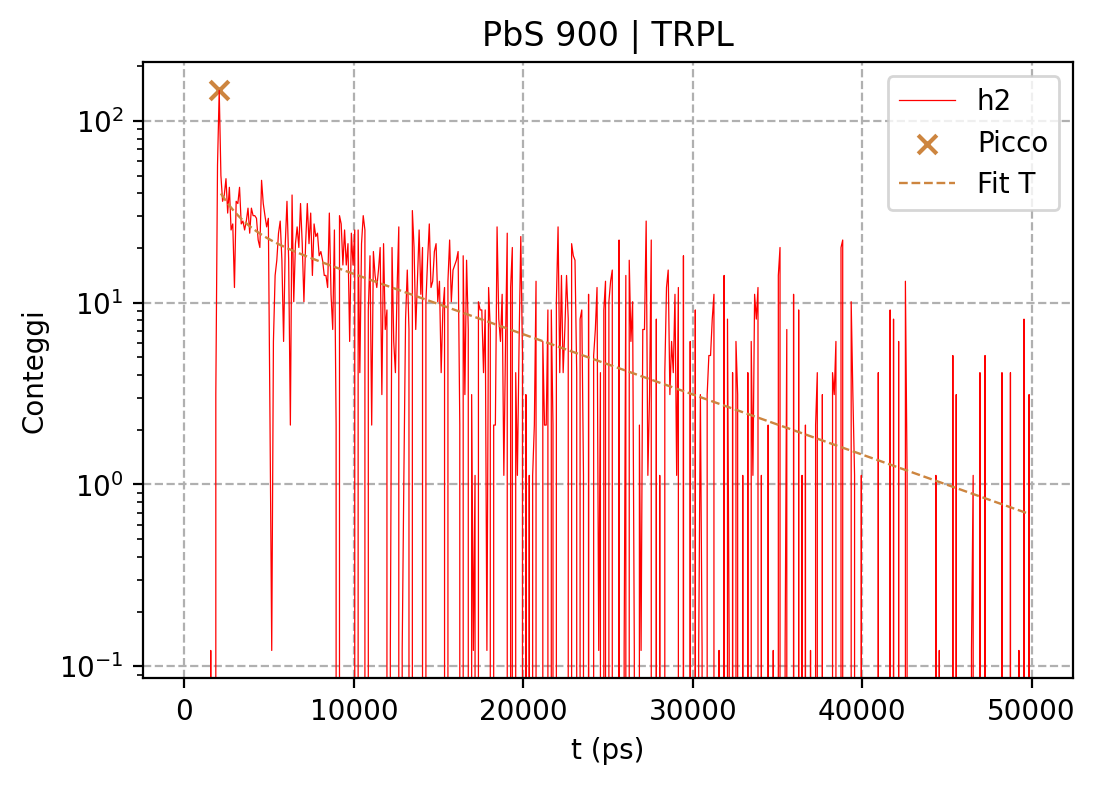

Fit 2^a colonna | -------------------
 - $a_1$ = 46.29524 ± 17558177.40929
 - $\tau_1$ = 13118.03 ± 2636.02
 - $a_2$ = 6627.12601 ± 27167694966.85361
 - $\tau_2$ = 1213.62 ± 884.76
 - $\Delta_x$ = -5348.16 ± 4975214699.69
 - $\Delta_y$ = 0.00000 ± 0.99130
 - $\chi_2/ndf$ = 0.72


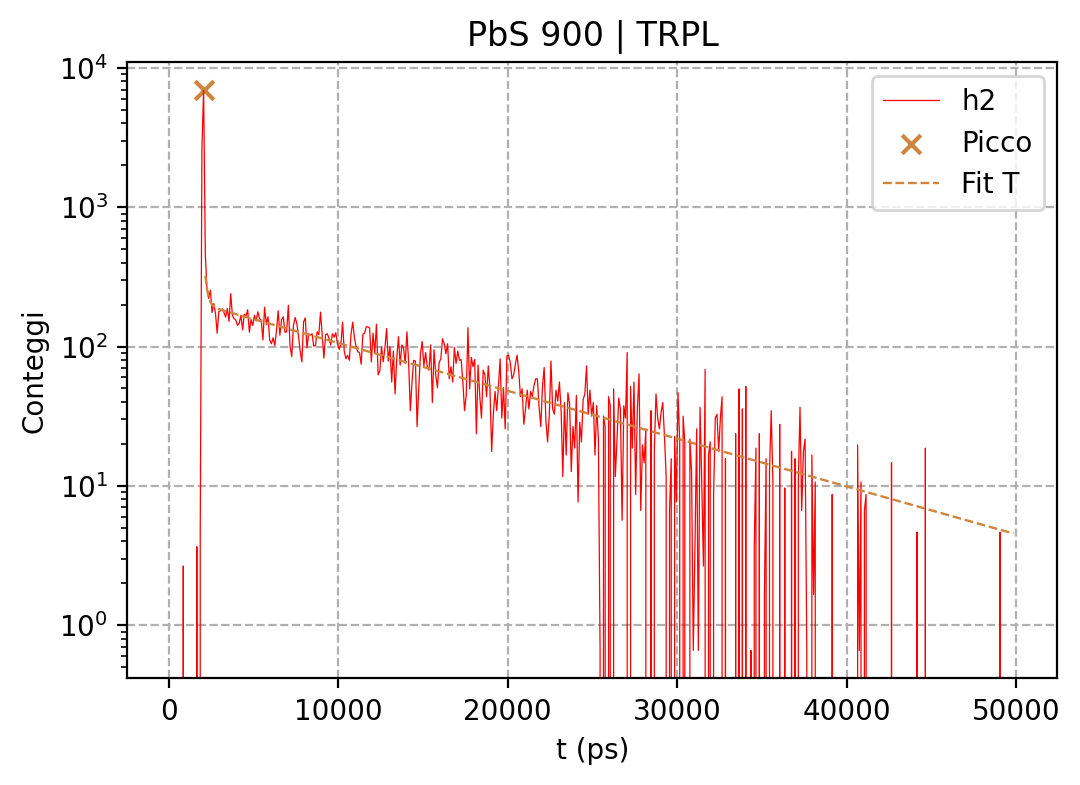

Fit 2^a colonna | -------------------
 - $a_1$ = 208.06324 ± 11924815.46363
 - $\tau_1$ = 12656.70 ± 638.48
 - $a_2$ = 12277.49601 ± 59451289831.68283
 - $\tau_2$ = 149.80 ± 98.63
 - $\Delta_x$ = 1464.26 ± 725398591.32
 - $\Delta_y$ = 0.00000 ± 2.31769
 - $\chi_2/ndf$ = 0.82


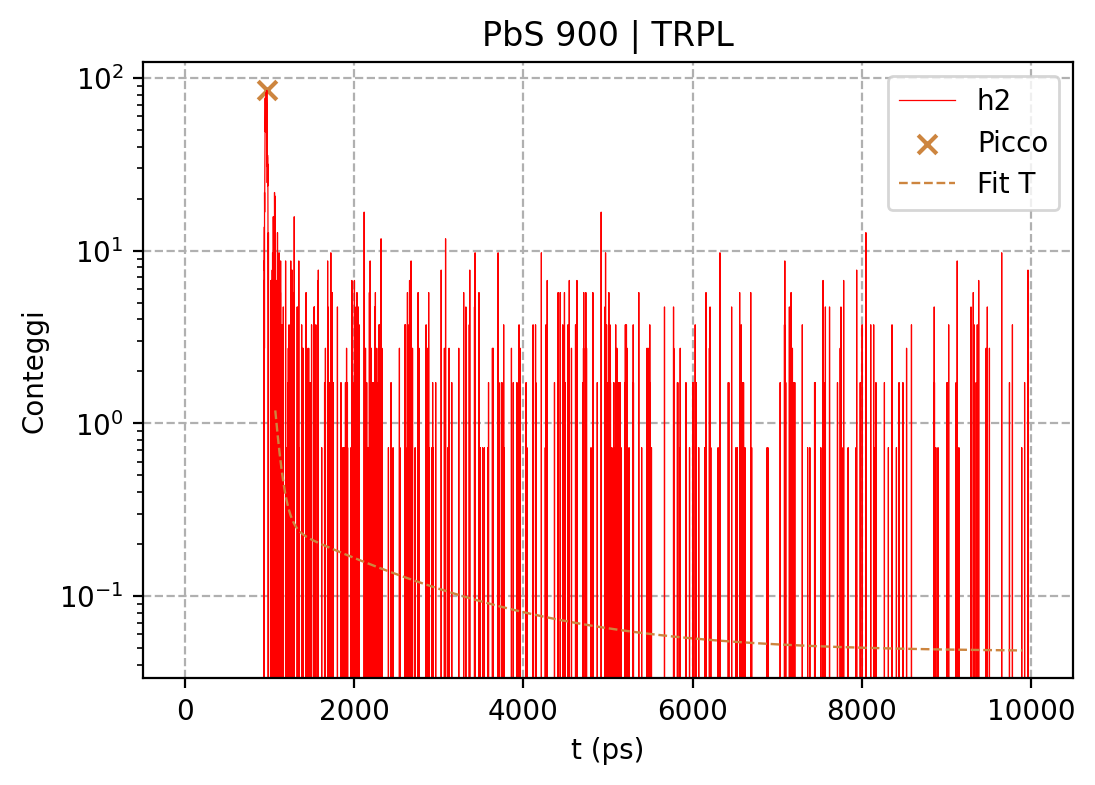

Fit 2^a colonna | -------------------
 - $a_1$ = 0.27670 ± 32695.65916
 - $\tau_1$ = 1564.95 ± 609.44
 - $a_2$ = 438.54021 ± 1272539208.14219
 - $\tau_2$ = 63.73 ± 21.40
 - $\Delta_x$ = 671.90 ± 184921399.39
 - $\Delta_y$ = 0.04767 ± 0.01316
 - $\chi_2/ndf$ = 0.30


In [270]:
for i, quadrupla in enumerate(PbS_trpl):
    time = quadrupla[0]
    curva2 = quadrupla[3]
    
    ## normalizzo i counts ##
    maximum2 = np.max(curva2)
    # prima propago l'errore
    err_curva2 = np.sqrt(curva2) # / maximum2
    # curva2 = curva2 / maximum2

    curva2 = trasla_counts_abs(curva2, 1.4)

    # Plot
    plt.figure(figsize=(6,4), dpi=200)
    plt.plot(time, curva2, linestyle='-', color='r', linewidth=0.45, label='h2')#, zorder=1)
    
    
    ## FIT DOPPIO ESPONENZIALE ##
    
    sup2 = max(time)-100
    i_max2 = np.argmax(curva2)
    
    # per capire dove secondo lui c'è il massimo di curve2
    x_picco = time[i_max2]
    y_picco = curva2[i_max2]
    plt.scatter(x_picco, y_picco, 
                color=col[4], marker='x',
                label='Picco', s=45)
        
        
    inf2 = time[i_max2] + 100
    # isolo regione fit
    mask = (time > inf2) & (time < sup2)
    x_fit = time[mask]
    y_fit2 = curva2[mask]
    err_fit2 = err_curva2[mask]

    # parametri (a1, tau1, a2, tau2)
    par = [1, 1750, 1, 12]
    par.append(2000) # il delta_x
    par.append(0.2) # il delta_y
    # usando risultato terzo fit
    #par = [0.07565398747075835, 2265.6438665046385, 5250554992968956.0, 29.236927103129098, 0, 0.26338796610139725]
    
    #par = params[i]
    
    low = [0, 0, 0, 0]
    low.append(-np.inf) # inf delta_x
    low.append(0) # inf delta_y
    upp = [np.inf, np.inf, np.inf, np.inf]
    upp.append(5000) # sup delta_x
    upp.append(0.5) # sup delta_y

    popt2, pcov2 = curve_fit(doppio_esponenziale, x_fit, y_fit2, sigma=err_fit2, p0=par, bounds=(low,upp))
    
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(inf2, sup2, len(x_fit))
    y_plot2 = doppio_esponenziale(x_plot, *popt2)
    
    plt.plot(x_plot, y_plot2, linestyle='--', color=col[4], label=f"Fit T", linewidth=0.85)#, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'PbS 900 | TRPL')
    plt.xlabel("t (ps)")
    #plt.xscale('log')
    plt.ylabel("Conteggi")
    plt.yscale('log')
    #plt.ticklabel_format(axis='x',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    ## CHI QUADRO ##
    chi2, dof = chi2_doppio_esponenziale (x_fit, y_fit2, popt2, err_y=err_fit2)
    
    ## ERRORI SUL FIT ##
    perr2 = np.sqrt(np.diag(pcov2))
    
    ## PRINT RISULTATI ##
    print('Fit 2^a colonna | -------------------')
    print(r' - $a_1$ = {:.5f} ± {:.5f}'.format(popt2[0], perr2[0]))
    print(r' - $\tau_1$ = {:.2f} ± {:.2f}'.format(popt2[1], perr2[1]))
    print(r' - $a_2$ = {:.5f} ± {:.5f}'.format(popt2[2], perr2[2]))
    print(r' - $\tau_2$ = {:.2f} ± {:.2f}'.format(popt2[3], perr2[3]))
    print(r' - $\Delta_x$ = {:.2f} ± {:.2f}'.format(popt2[4], perr2[4]))
    print(r' - $\Delta_y$ = {:.5f} ± {:.5f}'.format(popt2[5], perr2[5]))
    print(r' - $\chi_2/ndf$ = {:.2f}'.format(chi2/dof))
   
    
    